<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#The-HiC_data-object" data-toc-modified-id="The-HiC_data-object-1">The HiC_data object</a></span></li><li><span><a href="#Filter-columns-with-too-few-interaction-count" data-toc-modified-id="Filter-columns-with-too-few-interaction-count-2">Filter columns with too few interaction count</a></span></li><li><span><a href="#Normalization" data-toc-modified-id="Normalization-3">Normalization</a></span><ul class="toc-item"><li><span><a href="#ICE-normalization" data-toc-modified-id="ICE-normalization-3.1">ICE normalization</a></span><ul class="toc-item"><li><span><a href="#Save-biases" data-toc-modified-id="Save-biases-3.1.1">Save biases</a></span></li></ul></li><li><span><a href="#Vanilla-normalization" data-toc-modified-id="Vanilla-normalization-3.2">Vanilla normalization</a></span><ul class="toc-item"><li><span><a href="#Save-biases" data-toc-modified-id="Save-biases-3.2.1">Save biases</a></span></li></ul></li><li><span><a href="#SQRT-normalization" data-toc-modified-id="SQRT-normalization-3.3">SQRT normalization</a></span><ul class="toc-item"><li><span><a href="#Save-biases" data-toc-modified-id="Save-biases-3.3.1">Save biases</a></span></li></ul></li><li><span><a href="#OneD-normalization" data-toc-modified-id="OneD-normalization-3.4">OneD normalization</a></span><ul class="toc-item"><li><span><a href="#Save-biases" data-toc-modified-id="Save-biases-3.4.1">Save biases</a></span></li></ul></li><li><span><a href="#Other-normalizations" data-toc-modified-id="Other-normalizations-3.5">Other normalizations</a></span></li></ul></li><li><span><a href="#Save-raw-and-normalized-matrices" data-toc-modified-id="Save-raw-and-normalized-matrices-4">Save raw and normalized matrices</a></span><ul class="toc-item"><li><span><a href="#Save-normalized-chromosome/genome-matrices" data-toc-modified-id="Save-normalized-chromosome/genome-matrices-4.1">Save normalized chromosome/genome matrices</a></span></li><li><span><a href="#Normalize-everything-at-many-resolutions" data-toc-modified-id="Normalize-everything-at-many-resolutions-4.2">Normalize everything at many resolutions</a></span></li></ul></li><li><span><a href="#References" data-toc-modified-id="References-5">References</a></span></li></ul></div>

# The HiC_data object

In [1]:
from pytadbit.parsers.hic_parser import load_hic_data_from_bam

In [2]:
cell = 'mouse_B'
repl = 'rep1'

reso = 1000000

In [3]:
hic_data = load_hic_data_from_bam(
    'results/fragment/{0}_{1}/03_filtering/valid_reads12_{0}_{1}.bam'.format(cell, repl),
    reso, ncpus=8)


  (Matrix size 2738x2738)                                                      [2018-10-01 22:08:51]

  - Parsing BAM (117 chunks)                                                   [2018-10-01 22:08:51]
     .......... .......... .......... .......... ..........     50/117
     .......... .......... .......... .......... ..........    100/117
     .......... .......                                        117/117

  - Getting matrices                                                           [2018-10-01 22:09:45]
     .......... .......... .......... .......... ..........     50/117
     .......... .......... .......... .......... ..........    100/117
     .......... .......                                        117/117



# Filter columns with too few interaction count

For this, very sparse, example dataset we are going to ask for very few interactions per bin.

This can be done either by setting `min_perc` asking for each bin to contain a minimum percentage of cells with interaction data. Or but setting `min_count` asking that the number of cells with interaction data of each bin is above the defined cutoff.


     1     2     3   197   198   199   379   380   381   382   540   541   542   543   698   699   700   792   850   851
   852   999  1000  1001  1002  1022  1146  1147  1148  1276  1277  1278  1401  1402  1403  1532  1533  1534  1619  1620
  1654  1655  1656  1657  1775  1776  1777  1778  1897  1898  1899  2022  2023  2024  2126  2127  2128  2129  2145  2226
  2227  2228  2260  2263  2321  2322  2323  2412  2413  2414  2474  2475  2476  2501  2502  2504  2599  2644  2645  2649
  2653  2654  2657  2658  2659  2660  2661  2662  2663  2664  2665  2666  2667  2668  2669  2670  2671  2672  2673  2674
  2675  2676  2677  2678  2679  2680  2681  2682  2683  2684  2685  2686  2687  2688  2689  2690  2691  2692  2693  2694
  2695  2696  2697  2698  2699  2700  2701  2702  2703  2704  2705  2706  2707  2708  2709  2710  2711  2712  2713  2714
  2715  2716  2717  2718  2719  2720  2721  2722  2723  2724  2725  2726  2727  2728  2729  2730  2731  2732  2733  2734
  2735  2737


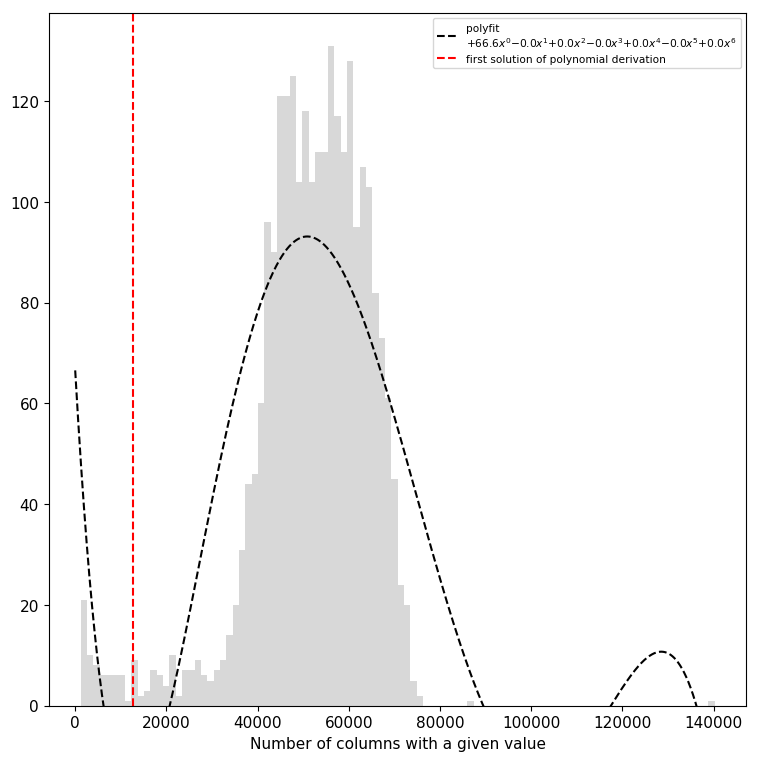

Found 228 of 2738 columns with poor signal



     1     2     3    67    68    69   197   198   199   372   373   379   380   381   382   540   541   542   543   583
   601   602   670   671   687   690   691   698   699   700   709   792   793   850   851   852   994   997   998   999
  1000  1001  1002  1008  1009  1020  1021  1022  1032  1146  1147  1148  1276  1277  1278  1400  1401  1402  1403  1532
  1533  1534  1602  1605  1619  1620  1621  1654  1655  1656  1657  1674  1675  1677  1678  1775  1776  1777  1778  1896
  1897  1898  1899  1900  1901  1902  1903  1939  1950  2022  2023  2024  2126  2127  2128  2129  2145  2221  2222  2225
  2226  2227  2228  2254  2260  2261  2262  2263  2321  2322  2323  2412  2413  2414  2474  2475  2476  2477  2478  2499
  2500  2501  2502  2503  2504  2506  2507  2508  2528  2597  2598  2599  2622  2623  2644  2645  2646  2647  2648  2649
  2650  2651  2652  2653  2654  2655  2656  2657  2658  2659  2660  2661  2662  2663  2664  2665  2666  2667  2668  2669
  2670  2671  2672  2673  2674 

In [4]:
hic_data.filter_columns(draw_hist=True, by_mean=True)

In [5]:
print len(hic_data)
print len(hic_data.bads)

2738
228


At 100 kb it makes no sense to view the full matrix (your matrix will have more cells than your screen have pixels).

Try plotting a region of the genome only, with the `focus` parameter.

/home/participant/miniconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:3477: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '
/home/participant/miniconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


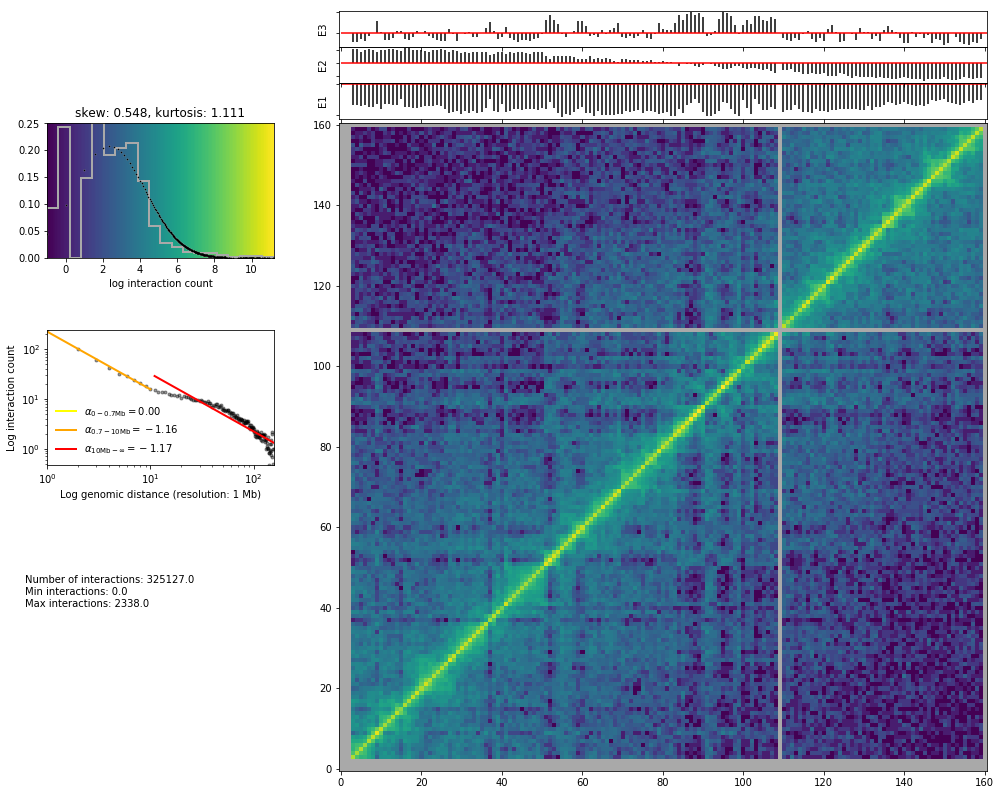

In [7]:
from pytadbit.mapping.analyze import hic_map

hic_map(hic_data, normalized=False, focus='chr3', show=True, cmap='viridis')

# Normalization

As normalization we use either the ICE normalization <a name="ref-1"/>[(Imakaev et al., 2012)](#cite-Imakaev2012a) with a "full" normalization until the sum of all columns of the matrix are equal, or something more similar to the _vanilla_ normalization used in <a name="ref-2"/>[(Rao et al., 2014)](#cite-Rao2014) which is exactly like running the ICE normalization without iterations.

_Note: if columns with a lot of zeroes are present the ICE normalization will last very long to converge, and these low-coverage columns will present, at the end of the normalization, few cells with very high values of interaction_

## ICE normalization

In [6]:
hic_data.normalize_hic(iterations=100, max_dev=0.00001)

iterative correction
  - copying matrix
  - computing biases
         12469.000       52805.025      139795.000    0   1.64738
         43530.929       53879.774       90730.001    1   0.68393
         42173.555       54171.123       61145.551    2   0.22148
         50456.397       54262.303       60476.793    3   0.11453
         50927.498       54295.094       56623.112    4   0.06202
         52978.883       54307.345       56576.190    5   0.04178
         52884.486       54312.165       55103.989    6   0.02629
         53847.776       54314.082       55263.047    7   0.01747
         53702.950       54314.865       54593.449    8   0.01127
         54149.427       54315.186       54718.631    9   0.00743
         54052.847       54315.319       54414.522   10   0.00483
         54255.976       54315.375       54487.749   11   0.00317
         54202.847       54315.398       54351.097   12   0.00207
         54293.826       54315.408       54389.194   13   0.00136
         54267.

/home/fransua/.miniconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:3477: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '
/home/fransua/.miniconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


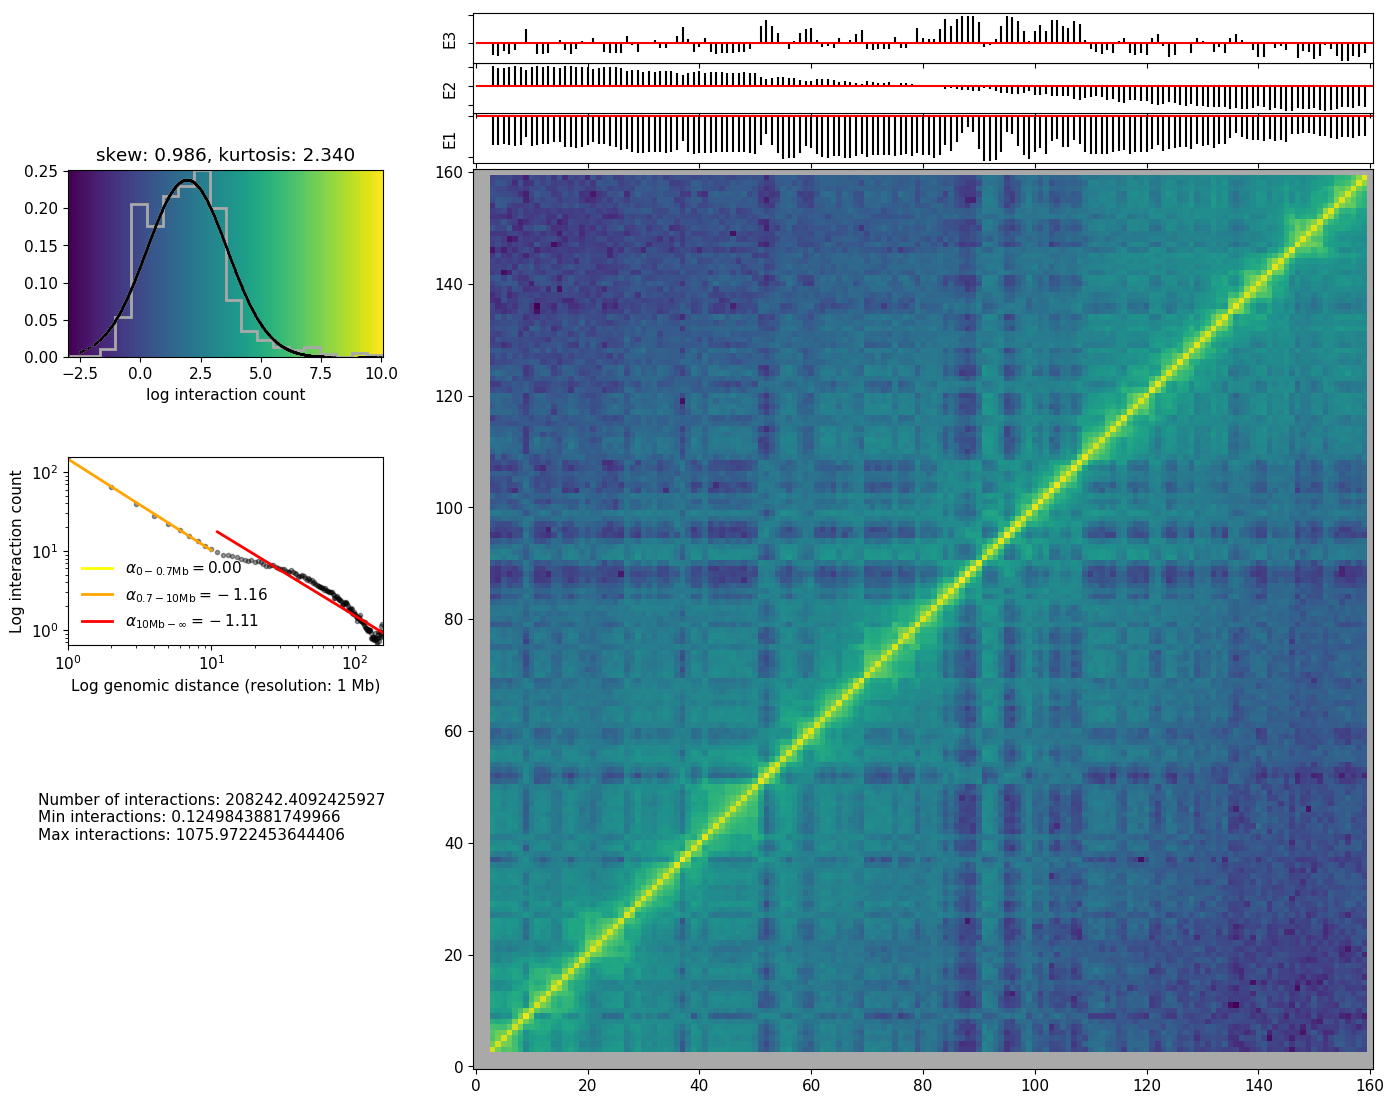

In [11]:
from pytadbit.mapping.analyze import hic_map

hic_map(hic_data, normalized=True, focus='chr3', show=True, cmap='viridis')

### Save biases

In [7]:
hic_data.save_biases('results/fragment/{0}_{1}/03_filtering/valid_reads12_{0}_{1}_ICE_{2}kb.biases'.format(
    cell, repl, reso / 1000))

## Vanilla normalization

In [12]:
hic_data.normalize_hic(iterations=0, max_dev=0.00001)

iterative correction
  - copying matrix
  - computing biases
rescaling to factor 1
  - getting the sum of the matrix
    => 2561.086
  - rescaling biases


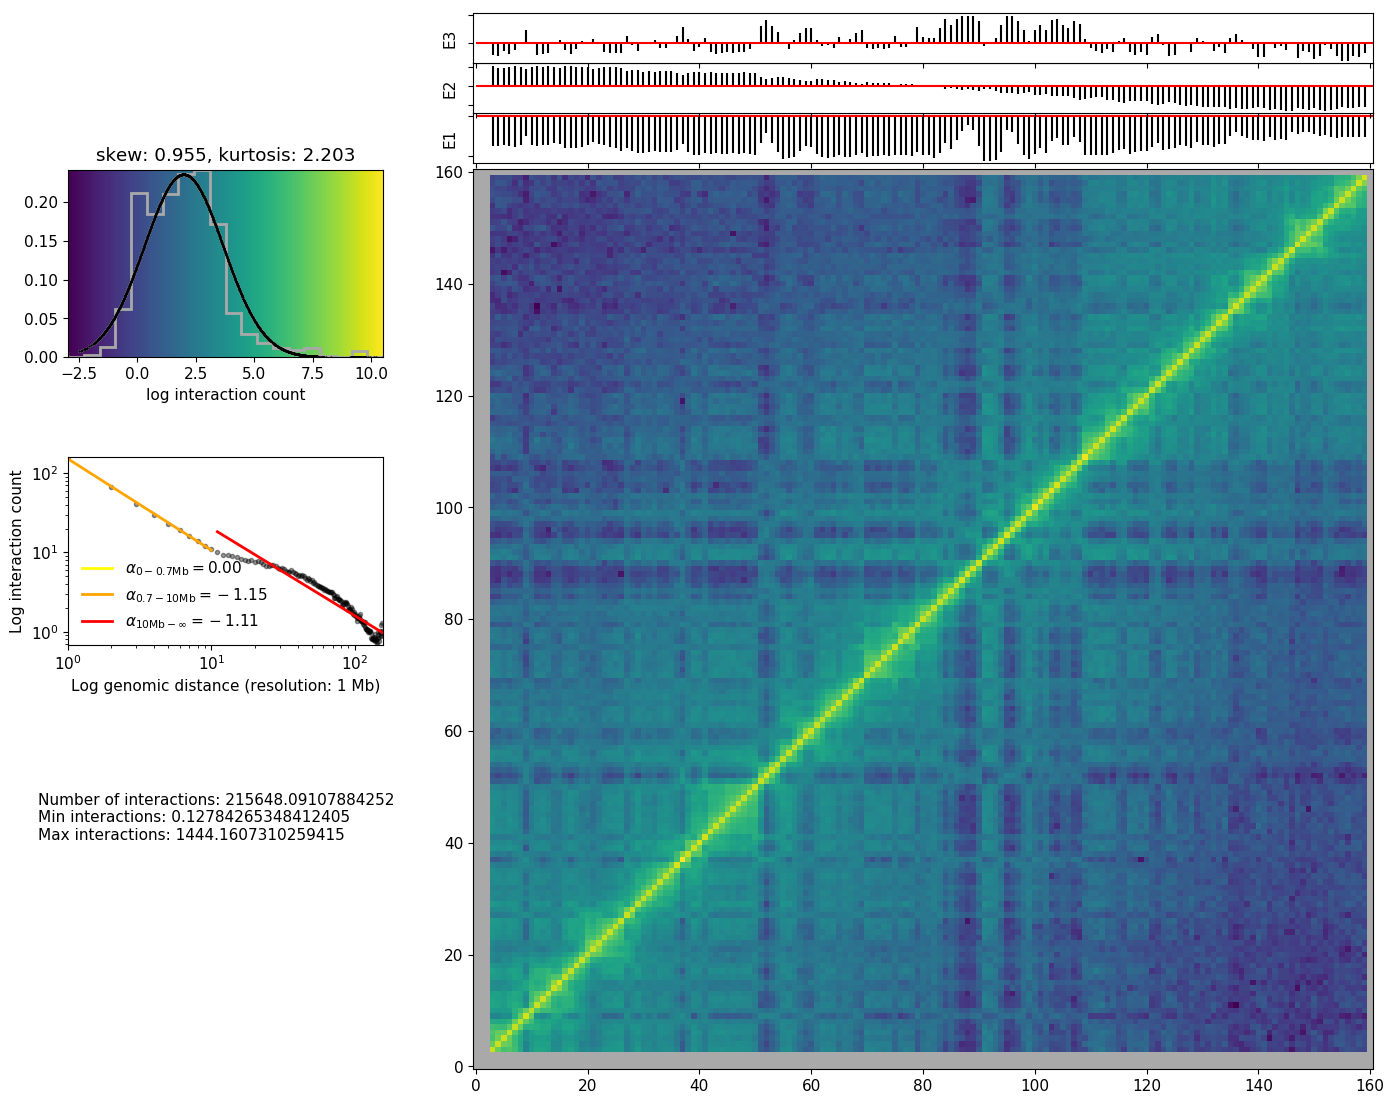

In [13]:
from pytadbit.mapping.analyze import hic_map

hic_map(hic_data, normalized=True, focus='chr3', show=True, cmap='viridis')

### Save biases

In [15]:
hic_data.save_biases('results/fragment/{0}_{1}/03_filtering/valid_reads12_{0}_{1}_Vanilla_{2}kb.biases'.format(
    cell, repl, reso / 1000))

## SQRT normalization

In [16]:
hic_data.normalize_hic(iterations=0, sqrt=True, max_dev=0.00001)

iterative correction
  - copying matrix
  - computing biases
rescaling to factor 1
  - getting the sum of the matrix
    => 572425.893
  - rescaling biases


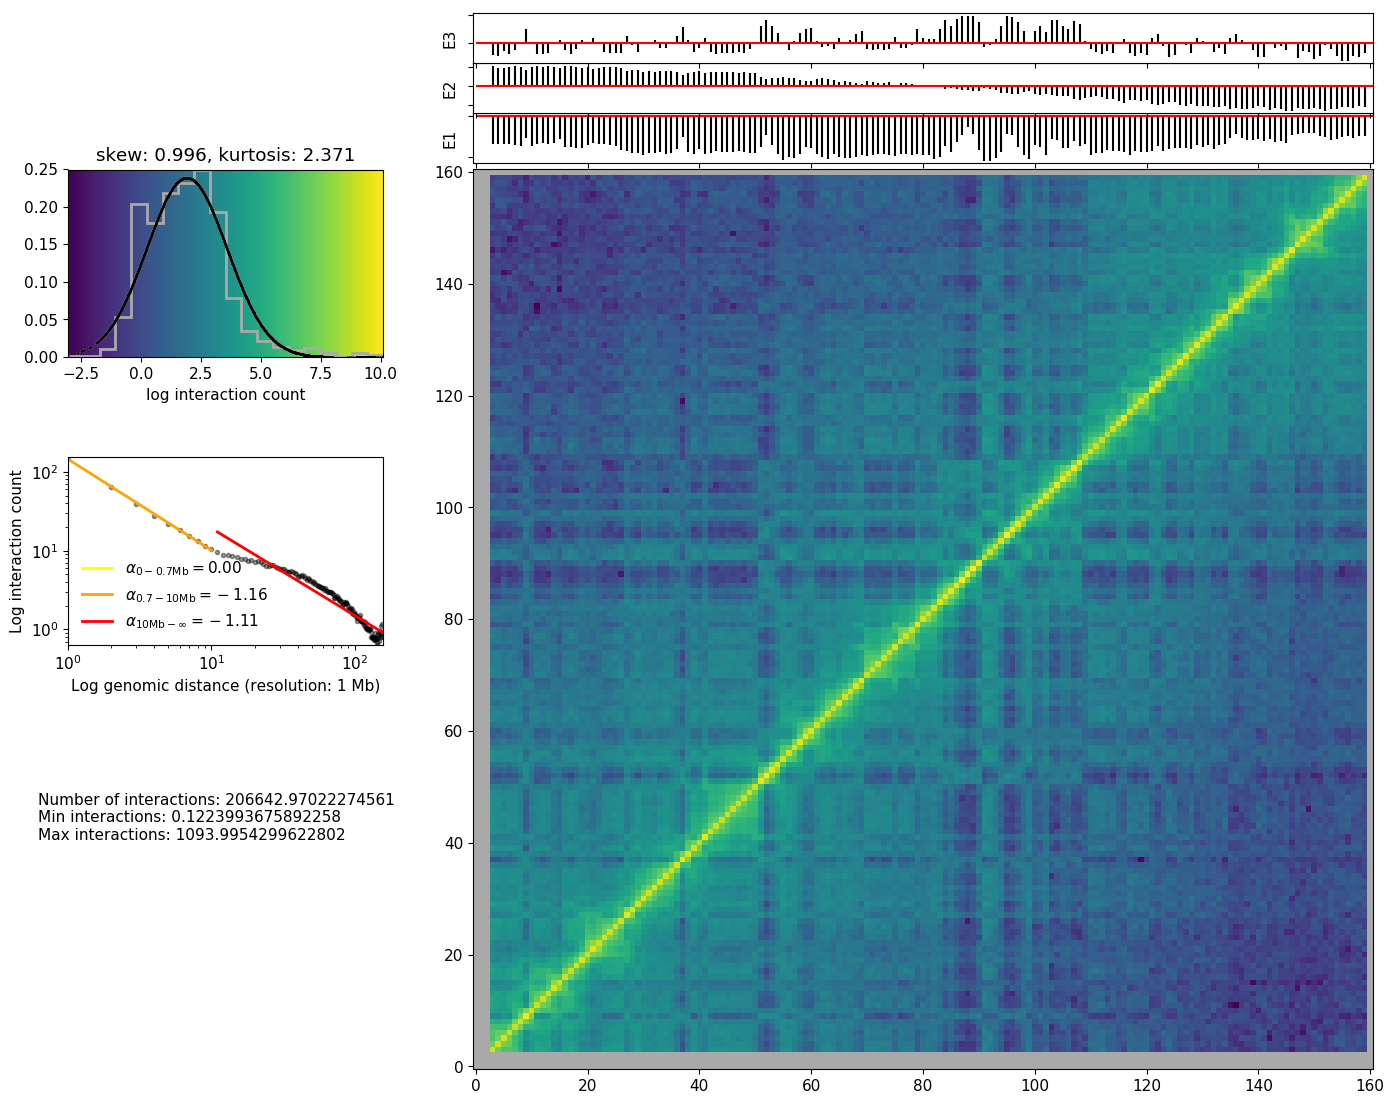

In [17]:
from pytadbit.mapping.analyze import hic_map

hic_map(hic_data, normalized=True, focus='chr3', show=True, cmap='viridis')

### Save biases

In [18]:
hic_data.save_biases('results/fragment/{0}_{1}/03_filtering/valid_reads12_{0}_{1}_SQRT_{2}kb.biases'.format(
    cell, repl, reso / 1000))

## OneD normalization

In [19]:
from pytadbit.parsers.bed_parser          import parse_mappability_bedGraph
from pytadbit.utils.normalize_hic         import oneD
from pytadbit.mapping.restriction_enzymes import RESTRICTION_ENZYMES
from pytadbit.parsers.genome_parser       import parse_fasta, get_gc_content

In [ ]:
fasta = 'genome/Mus_musculus-GRCm38.p6/Mus_musculus-GRCm38.p6.fa'
genome = parse_fasta(fasta, verbose=False)

get mappability ~2 min

In [ ]:
f_mappability = 'genome/Mus_musculus-GRCm38.p6/Mus_musculus-GRCm38.p6.50mer.bedGraph'

mappability = parse_mappability_bedGraph(f_mappability, reso)

In [24]:
for c in refs:
    if not c in mappability:
        mappability[c] = [float('nan')] * (len(genome) / reso + 1)
    if len(mappability[c]) < len(genome) / reso + 1:
        mappability[c] += [float('nan')] * (
            (len(refs) / reso + 1) - len(mappability[c]))
mappability = reduce(lambda x, y: x + y,
                     (mappability.get(c, []) for c in refs))

get GC content ~ 30 sec

In [42]:
gc_content = get_gc_content(genome, reso, n_cpus=8)

compute r_sites ~30 sec

In [26]:
re_site = RESTRICTION_ENZYMES['MboI'].replace('|', '')

n_rsites  = []
for crm in genome:
    for pos in xrange(0, len(genome[crm]), reso):
        seq = genome[crm][pos:pos + reso + 400]
        n_rsites.append(seq.count(re_site))

In [29]:
sum_cols = [float('nan') if c in hic_data.bads else 
            sum(0.0 if l in hic_data.bads else hic_data[c, l] for l in xrange(len(hic_data))) 
            for c in xrange(len(hic_data))]

/home/fransua/.miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
biases = oneD(tot=sum_cols, map=mappability, res=n_rsites, cg=gc_content)

In [40]:
hic_data.bias = list(biases)

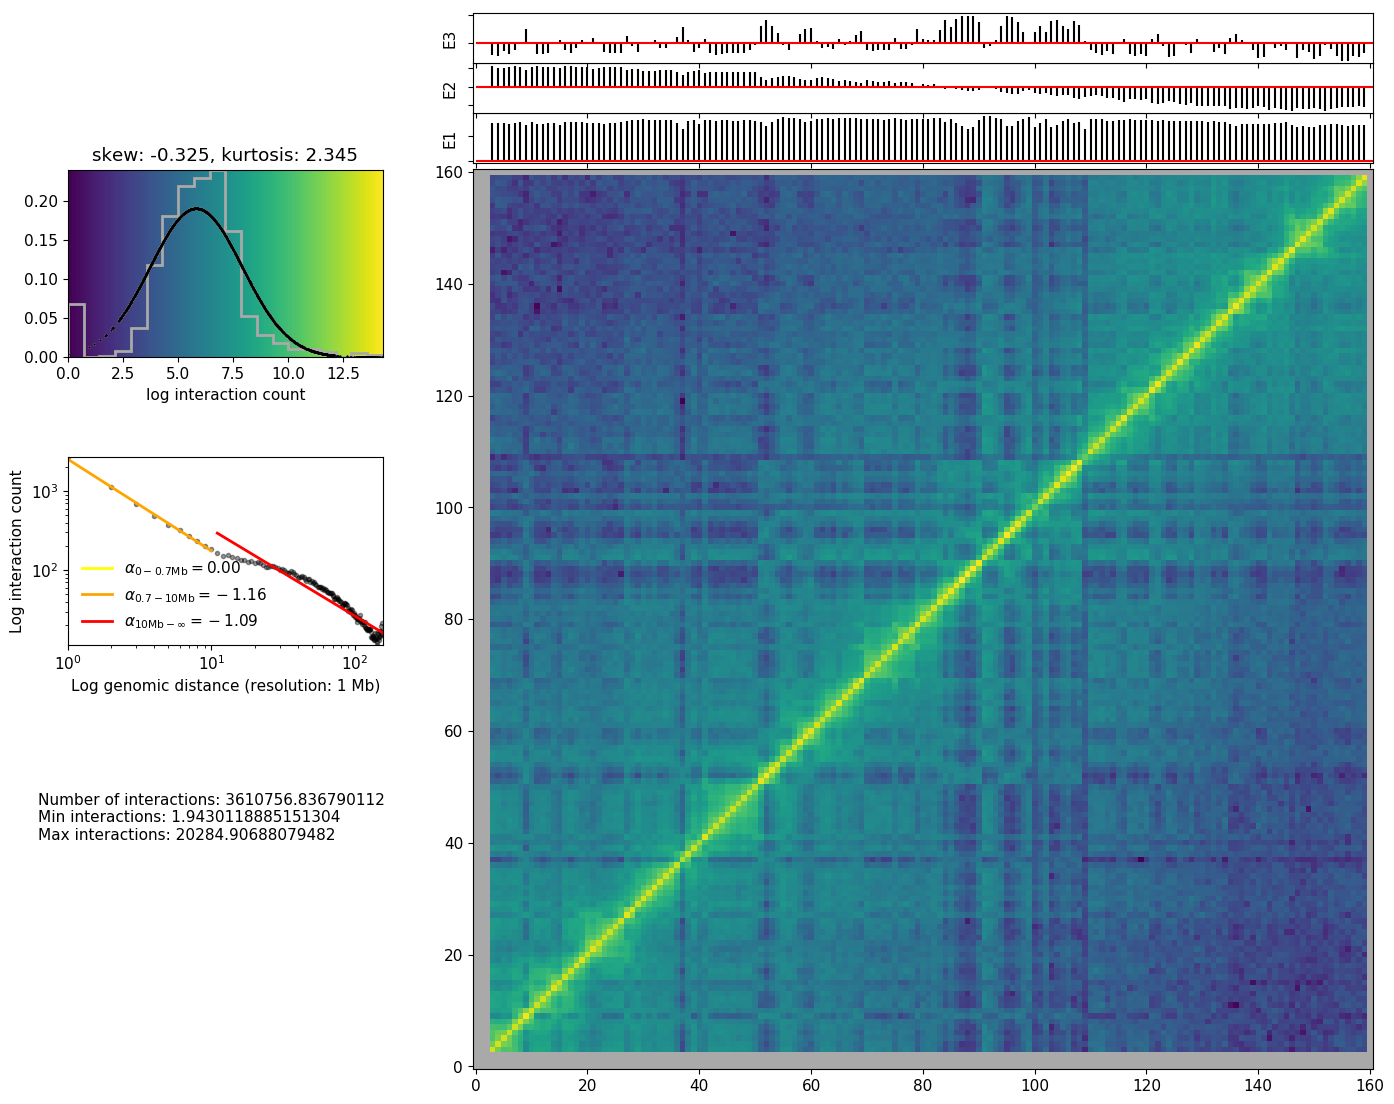

In [41]:
from pytadbit.mapping.analyze import hic_map

hic_map(hic_data, normalized=True, focus='chr3', show=True, cmap='viridis')

### Save biases

In [36]:
hic_data.save_biases('results/fragment/{0}_{1}/03_filtering/valid_reads12_{0}_{1}_oneD_{2}kb.biases'.format(
    cell, repl, reso / 1000))

## Other normalizations

ICE and Vanilla normalizations are widely used however other, more convoluted, normalizations <a name="ref-1"/>[(Hu et al., 2012)](#cite-hu2012hicnorm) <a name="ref-2"/>[(Yaffe and Tanay, 2011)](#cite-Yaffe2011) can be used outside TADbit and then added as normalized matrices.

# Save raw and normalized matrices

## Save normalized chromosome/genome matrices

This time we do not need to save appart the normalization biases and the list of columns with poor signal.

In [15]:
hic_map(hic_data, by_chrom='intra', normalized=False,
       savedata='results/fragment/{1}_{2}/04_normalizing/{0}_raw'.format(reso, cell, rep))

In [16]:
hic_map(hic_data, by_chrom='intra', normalized=True,
       savedata='results/fragment/{1}_{2}/04_normalizing/{0}_norm'.format(reso, cell, rep))

## Normalize everything at many resolutions

In [20]:
for reso in [100000, 200000, 1000000]:
    for cell in ['mouse_B', 'mouse_PSC']:
        for rep in ['rep1', 'rep2']:
            print rep, cell, reso
            hic_data = load_hic_data_from_reads(
                'results/fragment/{0}_{1}/03_filtering/valid_reads12_{0}_{1}.tsv'.format(cell, rep),
                reso)
            hic_data.filter_columns(silent=True, by_mean=True, min_count=10)
            hic_data.normalize_hic(iterations=0, max_dev=0.00001)
            out = open('results/fragment/{1}_{2}/04_normalizing/biases_{0}_{1}_{2}.pick'.format(reso, cell, rep), 'w')
            dump(hic_data.bias, out)
            out.close()
            
            out = open('results/fragment/{1}_{2}/04_normalizing/bad_columns_{0}_{1}_{2}.pick'.format(reso, cell, rep), 'w')
            dump(hic_data.bads, out)
            out.close()

rep1 mouse_B 100000


iterative correction
  - copying matrix
  - computing biases
rescaling to factor 1
  - getting the sum of the matrix
    => 25641.554
  - rescaling biases
rep2 mouse_B 100000


iterative correction
  - copying matrix
  - computing biases
rescaling to factor 1
  - getting the sum of the matrix
    => 25570.117
  - rescaling biases
rep1 mouse_PSC 100000


iterative correction
  - copying matrix
  - computing biases
rescaling to factor 1
  - getting the sum of the matrix
    => 27077.169
  - rescaling biases
rep2 mouse_PSC 100000


iterative correction
  - copying matrix
  - computing biases
rescaling to factor 1
  - getting the sum of the matrix
    => 26087.885
  - rescaling biases
rep1 mouse_B 200000


iterative correction
  - copying matrix
  - computing biases
rescaling to factor 1
  - getting the sum of the matrix
    => 12986.538
  - rescaling biases
rep2 mouse_B 200000


iterative correction
  - copying matrix
  - computing biases
rescaling to factor 1
  - getting the sum of the matrix
    => 12849.185
  - rescaling biases
rep1 mouse_PSC 200000


iterative correction
  - copying matrix
  - computing biases
rescaling to factor 1
  - getting the sum of the matrix
    => 13602.314
  - rescaling biases
rep2 mouse_PSC 200000


iterative correction
  - copying matrix
  - computing biases
rescaling to factor 1
  - getting the sum of the matrix
    => 13321.069
  - rescaling biases
rep1 mouse_B 1000000


iterative correction
  - copying matrix
  - computing biases
rescaling to factor 1
  - getting the sum of the matrix
    => 2619.418
  - rescaling biases
rep2 mouse_B 1000000


iterative correction
  - copying matrix
  - computing biases
rescaling to factor 1
  - getting the sum of the matrix
    => 2619.118
  - rescaling biases
rep1 mouse_PSC 1000000


iterative correction
  - copying matrix
  - computing biases
rescaling to factor 1
  - getting the sum of the matrix
    => 2772.102
  - rescaling biases
rep2 mouse_PSC 1000000


iterative correction
  - copying matrix
  - computing biases
rescaling to factor 1
  - getting the sum of the matrix
    => 2755.464
  - rescaling biases


<!--bibtex
@article{hu2012hicnorm,
  title={HiCNorm: removing biases in Hi-C data via Poisson regression},
  author={Hu, Ming and Deng, Ke and Selvaraj, Siddarth and Qin, Zhaohui and Ren, Bing and Liu, Jun S},
  journal={Bioinformatics},
  volume={28},
  number={23},
  pages={3131--3133},
  year={2012},
  publisher={Oxford Univ Press}
}
@article{Yaffe2011,
abstract = {Hi-C experiments measure the probability of physical proximity between pairs of chromosomal loci on a genomic scale. We report on several systematic biases that substantially affect the Hi-C experimental procedure, including the distance between restriction sites, the GC content of trimmed ligation junctions and sequence uniqueness. To address these biases, we introduce an integrated probabilistic background model and develop algorithms to estimate its parameters and renormalize Hi-C data. Analysis of corrected human lymphoblast contact maps provides genome-wide evidence for interchromosomal aggregation of active chromatin marks, including DNase-hypersensitive sites and transcriptionally active foci. We observe extensive long-range (up to 400 kb) cis interactions at active promoters and derive asymmetric contact profiles next to transcription start sites and CTCF binding sites. Clusters of interacting chromosomal domains suggest physical separation of centromere-proximal and centromere-distal regions. These results provide a computational basis for the inference of chromosomal architectures from Hi-C experiments.},
author = {Yaffe, Eitan and Tanay, Amos},
doi = {10.1038/ng.947},
file = {:home/fransua/.local/share/data/Mendeley Ltd./Mendeley Desktop/Downloaded/Yaffe, Tanay - 2011 - Probabilistic modeling of Hi-C contact maps eliminates systematic biases to characterize global chromosomal archit.pdf:pdf},
issn = {1546-1718},
journal = {Nature genetics},
keywords = {Binding Sites,Chromosomes,Cluster Analysis,Epigenesis,Genetic,Human,Humans,Lymphocytes,Lymphocytes: ultrastructure,Models,Probability},
mendeley-groups = {Research articles},
month = {nov},
number = {11},
pages = {1059--65},
pmid = {22001755},
title = {{Probabilistic modeling of Hi-C contact maps eliminates systematic biases to characterize global chromosomal architecture.}},
url = {http://www.ncbi.nlm.nih.gov/pubmed/22001755},
volume = {43},
year = {2011}
}
@article{Imakaev2012a,
abstract = {Extracting biologically meaningful information from chromosomal interactions obtained with genome-wide chromosome conformation capture (3C) analyses requires the elimination of systematic biases. We present a computational pipeline that integrates a strategy to map sequencing reads with a data-driven method for iterative correction of biases, yielding genome-wide maps of relative contact probabilities. We validate this ICE (iterative correction and eigenvector decomposition) technique on published data obtained by the high-throughput 3C method Hi-C, and we demonstrate that eigenvector decomposition of the obtained maps provides insights into local chromatin states, global patterns of chromosomal interactions, and the conserved organization of human and mouse chromosomes.},
author = {Imakaev, Maxim V and Fudenberg, Geoffrey and McCord, Rachel Patton and Naumova, Natalia and Goloborodko, Anton and Lajoie, Bryan R and Dekker, Job and Mirny, Leonid A},
doi = {10.1038/nmeth.2148},
file = {:home/fransua/.local/share/data/Mendeley Ltd./Mendeley Desktop/Downloaded/Imakaev et al. - 2012 - Iterative correction of Hi-C data reveals hallmarks of chromosome organization.pdf:pdf},
issn = {1548-7105},
journal = {Nature methods},
keywords = {Hi-C},
mendeley-groups = {stats/Hi-C,Research articles},
mendeley-tags = {Hi-C},
month = {oct},
number = {10},
pages = {999--1003},
pmid = {22941365},
title = {{Iterative correction of Hi-C data reveals hallmarks of chromosome organization.}},
url = {http://www.ncbi.nlm.nih.gov/pubmed/22941365},
volume = {9},
year = {2012}
}
@article{Rao2014,
author = {Rao, Suhas S P and Huntley, Miriam H and Durand, Neva C and Stamenova, Elena K and Bochkov, Ivan D. and {James T. Robinson} and Sanborn, Adrian L. and Machol, Ido and Omer, Arina D. and Lander, Eric S. and Lieberman-Aiden, Erez},
doi = {10.1016/j.cell.2014.11.021},
file = {:home/fransua/.local/share/data/Mendeley Ltd./Mendeley Desktop/Downloaded/Rao et al. - 2014 - A 3D Map of the Human Genome at Kilobase Resolution Reveals Principles of Chromatin Looping.pdf:pdf},
issn = {0092-8674},
journal = {Cell},
keywords = {Hi-C},
mendeley-groups = {Research articles,projects/GEVO/CTCF},
mendeley-tags = {Hi-C},
number = {7},
pages = {1665--1680},
pmid = {25497547},
publisher = {Elsevier Inc.},
title = {{A 3D Map of the Human Genome at Kilobase Resolution Reveals Principles of Chromatin Looping}},
url = {http://dx.doi.org/10.1016/j.cell.2014.11.021},
volume = {159},
year = {2014}
}

-->

# References

<a name="cite-Imakaev2012a"/><sup>[^](#ref-1) </sup>Imakaev, Maxim V and Fudenberg, Geoffrey and McCord, Rachel Patton and Naumova, Natalia and Goloborodko, Anton and Lajoie, Bryan R and Dekker, Job and Mirny, Leonid A. 2012. _Iterative correction of Hi-C data reveals hallmarks of chromosome organization._. [URL](http://www.ncbi.nlm.nih.gov/pubmed/22941365)

<a name="cite-Rao2014"/><sup>[^](#ref-2) </sup>Rao, Suhas S P and Huntley, Miriam H and Durand, Neva C and Stamenova, Elena K and Bochkov, Ivan D. and James T. Robinson and Sanborn, Adrian L. and Machol, Ido and Omer, Arina D. and Lander, Eric S. and Lieberman-Aiden, Erez. 2014. _A 3D Map of the Human Genome at Kilobase Resolution Reveals Principles of Chromatin Looping_. [URL](http://dx.doi.org/10.1016/j.cell.2014.11.021)

<a name="cite-hu2012hicnorm"/><sup>[^](#ref-3) </sup>Hu, Ming and Deng, Ke and Selvaraj, Siddarth and Qin, Zhaohui and Ren, Bing and Liu, Jun S. 2012. _HiCNorm: removing biases in Hi-C data via Poisson regression_.

<a name="cite-Yaffe2011"/><sup>[^](#ref-4) </sup>Yaffe, Eitan and Tanay, Amos. 2011. _Probabilistic modeling of Hi-C contact maps eliminates systematic biases to characterize global chromosomal architecture._. [URL](http://www.ncbi.nlm.nih.gov/pubmed/22001755)

